<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-Learning-Lab-2020/blob/Taraneh/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [ ]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



In [ ]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  0.5914289
iter:  1 cost:  0.590312
iter:  2 cost:  0.5891979
iter:  3 cost:  0.5880863
iter:  4 cost:  0.5869776
iter:  5 cost:  0.58587164
iter:  6 cost:  0.58476853
iter:  7 cost:  0.5836683
iter:  8 cost:  0.5825709
iter:  9 cost:  0.5814764
predicted  [[-0.07052338 -1.4182088  -0.20726368  0.6065073 ]
 [-0.41022846  0.7640786   1.0915788   0.5919728 ]
 [-0.07066503 -0.73823565  0.10052644  0.31935224]
 [-0.2946304  -0.3036949  -0.28762203  1.1227872 ]
 [-0.57840925  0.8397043   0.8986697   1.1970941 ]
 [-0.32035732 -0.3043637  -0.03262401  1.0779576 ]
 [-0.25558242 -0.41777548  0.2828037   0.74326414]
 [-0.6702078   0.774465    0.18325244  1.8486446 ]
 [-0.3652569   0.5447639   0.8380182   0.6200657 ]
 [-0.48676854  1.0157775   1.195501    0.7295743 ]]
real  [[0.28427788 0.58920269 0.76702838 0.54495026]
 [0.10077242 0.44421162 0.08474814 0.63117015]
 [0.01157148 0.14526119 0.81988115 0.22006669]
 [0.09844534 0.24078169 0.60496677 0.87281952]
 [0.21494239 0.5097351 

In [1]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4
#  O   O   O   O
#  O   O   O   O
#  O   O   O   O
#      O   O   O
#          O   
#          O   
#          O   
#          O   
#          O   
#          O   


num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))



#F(WX+b)
# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer

#placeholders/inputs:outpus --> Variables/Weights --> Model --> cost --> optimizer --> initilize all variables --> start the session

# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
iter:  0 cost:  3.7154167
iter:  1 cost:  3.683918
iter:  2 cost:  3.6526089
iter:  3 cost:  3.6214912
iter:  4 cost:  3.5905685
iter:  5 cost:  3.5598426
iter:  6 cost:  3.5293164
iter:  7 cost:  3.4989905
iter:  8 cost:  3.468869
iter:  9 cost:  3.438953
predicted  [[-1.6994138   3.139545   -0.4892214   1.2918464 ]
 [-1.4141936   3.3962379  -0.56025493  1.5004289 ]
 [-1.4271342   3.3675833  -0.5393368   1.5128952 ]
 [-1.6095712   3.2013707  -0.47851884  1.3919413 ]
 [-1.3633152   3.4307165  -0.57185465  1.5379093 ]
 [-1.4424294   3.3801365  -0.5667      1.4672735 ]
 [-1.7370307   3.1341696  -0.56446815  1.1919265 ]
 [-1.6812286   3.1714983  -0.5625444   1.2488736 ]
 [-1.69051     3.1477184  -0.4841122   1.3061322 ]
 [-1.7484171   3.0911536  -0.47290224  1.2563245 ]]
real  [[0.24953134 0.73089036 0.9260432  0.02266804]
 [0.26182008 0.19663483 0.14013938 0.71980935]
 [0.97197882 0.45010515 0.2

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


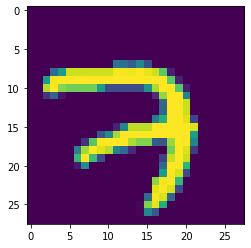

In [2]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

display(mnist.train.images.shape) # 28*28 = 784

image =mnist.train.images[0].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

print(mnist.train.labels[0])

In [3]:
import time 
tic = time.clock()


In [4]:
import tensorflow as tf
import numpy as np

# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# testing data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()
tic = time.clock()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    #print('predicted ', y_p_p)
    #print('real ', y_gr)



toc = time.clock()
toc-tic

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

iter:  0 train_cost:  12.1140585 train_acc:  0.0859375 test_cost:  11.795431 test_acc:  0.078125
iter:  1 train_cost:  11.158198 train_acc:  0.1015625 test_cost:  10.622961 test_acc:  0.0859375
iter:  2 train_cost:  9.48166 train_acc:  0.1484375 test_cost:  10.758317 test_acc:  0.0859375
iter:  3 train_cost:  10.0866165 train_acc:  0.078125 test_cost:  10.30264 test_acc:  0.1171875
iter:  4 train_cost:  8.962734 train_acc:  0.109375 test_cost:  9.430954 test_acc:  0.0703125
iter:  5 train_cost:  9.232653 train_acc:  0.09375 test_cost:  9.372509 test_acc:  0.0546875
iter:  6 train_cost:  9.555784 train_acc:  0.1015625 test_cost:  8.978596 test_acc:  0.109375
iter:  7 train_cost:  8.785046 train_acc:  0.078125 test_cost:  9.376514 test_acc:  0.0625
iter:  8 train_cost:  7.9027333 train_acc:  0.109375

12.232889999999998

In [ ]:
# 10.579477999999998 TPU
# 10.682025999999999 CPU
# 8.640348 GPU 


# CNN using Tensorflow




In [3]:
import tensorflow as tf
import time 

n_classes=10
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID') #padding='SAME' padding='VALID'
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    print('con1_before max',conv1.get_shape().as_list())

    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=1)
    print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    print('con2_before max',conv2.get_shape().as_list())

    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=1)
    print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 28*28*64 inputs, 1024 outputs when padding same, with padding valid use 20*20*64
    'wd1': tf.Variable(tf.random_normal([20*20*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

num_inputs = 784
num_outputs = 10
learning_rate = 0.001
batch_size = 128



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


y_p = conv_net(x, weights, biases)

#crossentropy cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()
tic = time.clock()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    #print('predicted ', y_p_p)
    #print('real ', y_gr)

toc = time.clock()
toc-tic

con1_before max [None, 24, 24, 32]
con1_after max [None, 24, 24, 32]
con2_before max [None, 20, 20, 64]
con2_after max [None, 20, 20, 64]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

iter:  0 train_cost:  131693.72 train_acc:  0.15625 test_cost:  141505.89 test_acc:  0.1328125
iter:  1 train_cost:  126852.22 train_acc:  0.09375 test_cost:  119884.125 test_acc:  0.078125
iter:  2 train_cost:  101349.74 train_acc:  0.1640625 test_cost:  130875.33 test_acc:  0.1328125
iter:  3 train_cost:  94684.34 train_acc:  0.234375 test_cost:  82604.59 test_acc:  0.2421875
iter:  4 train_cost:  99183.23 train_acc:  0.25 test_cost:  89858.41 test_acc:  0.265625
iter:  5 train_cost:  70825.97 train_acc:  0.3515625 test_cost:  82060.26 test_acc:  0.3125
iter:  6 train_cost:  55294.773 train_acc:  0.3359375 test_cost:  66866.31 test_acc:  0.375
iter:  7 train_co

2997.9052

**First trial**: time with GPU and padding = same is 83.78841700000001 
iter:  999 train_cost:  254.80815 train_acc:  0.96875 test_cost:  579.3871 test_acc:  0.96875




**Second trial**: time with GPU and padding = valid is 53.809466999999984 
iter:  999 train_cost:  803.3296 train_acc:  0.96875 test_cost:  944.3785 test_acc:  0.96875


**Third trial**: time with TPU and padding = valid is 2997.9052
iter:  999 train_cost:  200.99738 train_acc:  0.9765625 test_cost:  545.8708 test_acc:  0.9765625
